In [1]:
%matplotlib inline 
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

In [2]:
data = pd.read_csv('./datasets/Uganda_seasonal_normalized_mean.csv')
data['Is_drought'] = data.drought_reported>0
data.head()

,District,year,Season,EVI_mean,NDVI_mean,SoilMoisture00_10cm_mean,SoilMoisture100_200cm_mean,SoilMoisture10_40cm_mean,SoilMoisture40_100cm_mean,SoilTemperature00_10cm_mean,...,precipitation_per_hour_v2_mean,rainfall_mean,surface_temperature_daytime_mean,surface_temperature_nighttime_mean,wind_speed_mean,SPEI_3month_lag1,drought_reported,drought_news_article,drought_desinventar,Is_drought
0,ABIM,2000,11_12,0.635496,0.232554,0.876312,0.199678,0.736812,0.605763,-0.619369,...,-0.469460,1.336204,-0.151764,-1.343323,-0.412148,0.946693,0,0,0,False
1,ABIM,2001,11_12,-0.087761,-0.109488,0.493821,0.183495,0.532963,0.545170,-0.342333,...,-0.254581,0.823853,-0.334808,-0.132387,-1.004612,1.014671,0,0,0,False
2,ABIM,2002,11_12,-1.376630,-1.645360,-1.512378,-1.487177,-1.611315,-1.905963,1.363756,...,-1.405233,-0.482233,2.041320,0.780647,0.752253,0.714817,0,0,0,False
3,ABIM,2003,11_12,0.271856,0.277573,-0.653029,-0.338649,-0.424325,-0.103768,0.496371,...,-1.661421,-1.335585,0.161190,0.848854,1.321092,-1.517769,0,0,0,False
4,ABIM,2004,11_12,-0.947108,-1.454412,-1.207277,-0.974946,-0.705645,-0.739778,0.922325,...,-1.550847,-0.415216,0.949508,-0.042240,0.929712,0.386794,0,0,0,False


In [3]:
All_label_list = ['drought_reported', 'drought_news_article', 'drought_desinventar', 'Is_drought']

label_name = 'Is_drought'

All_feature_list = list(data.drop(labels=['District','year','Season']+All_label_list, 
                                  axis=1).columns)

In [4]:
reduced_data = pd.DataFrame()

for name,group in data.groupby('District'):
    drought_years = np.array(group[group[label_name]]['year'])
    keep_years = np.sort(np.unique(np.append(drought_years, [drought_years-1, drought_years+1])))
    temp = group[group.year.apply(lambda x: x in keep_years)].sort_values(by=['year', 'Season']).copy()
    reduced_data = pd.concat([reduced_data, temp])

reduced_data.reset_index(drop=True,inplace=True)

reduced_data

,District,year,Season,EVI_mean,NDVI_mean,SoilMoisture00_10cm_mean,SoilMoisture100_200cm_mean,SoilMoisture10_40cm_mean,SoilMoisture40_100cm_mean,SoilTemperature00_10cm_mean,...,precipitation_per_hour_v2_mean,rainfall_mean,surface_temperature_daytime_mean,surface_temperature_nighttime_mean,wind_speed_mean,SPEI_3month_lag1,drought_reported,drought_news_article,drought_desinventar,Is_drought
0,ABIM,2008,11_12,0.472112,0.433406,-0.299935,-0.401658,-0.513232,-0.373943,0.023236,...,0.410969,-1.040561,-0.863988,0.257548,-0.612212,-0.956344,0,0,0,False
1,ABIM,2008,6_7,-0.777660,-0.791877,-1.087030,-0.125215,-1.219722,-0.580102,0.439307,...,-1.185724,-1.264110,0.536434,-0.633266,0.620304,-1.891516,0,0,0,False
2,ABIM,2009,11_12,-0.959034,-0.776766,-1.828673,-1.776568,-2.402835,-2.509079,1.557044,...,-0.086266,-1.469191,0.695129,1.286431,0.241868,-0.076895,0,0,0,False
3,ABIM,2009,6_7,-0.120184,-0.124127,-0.739839,-0.331838,-0.530722,-0.566959,0.340174,...,-1.107978,-0.534604,-0.054718,0.841467,0.525038,-0.231664,1,0,1,True
4,ABIM,2010,11_12,-0.392718,-0.499785,0.371432,-0.556741,0.039433,0.004917,-0.270119,...,-0.157900,-0.071552,-0.416993,-0.514385,-0.869060,-0.565711,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,ZOMBO,2008,6_7,0.214773,0.153118,-1.859536,-1.198422,-2.015221,-1.832033,0.628148,...,-0.255114,-2.084574,-0.593314,-0.605235,-0.070227,-1.785325,0,0,0,False
362,ZOMBO,2009,11_12,-0.290805,-1.009758,-3.065165,-2.656704,-3.099320,-3.130685,1.730749,...,0.490798,-2.746914,1.026036,0.295994,1.210698,-1.801010,0,0,0,False
363,ZOMBO,2009,6_7,-0.834401,-0.756735,-1.599447,-1.240679,-1.664688,-1.524388,0.569586,...,-1.583708,-1.666039,0.581066,-0.022231,0.534914,-1.037791,1,0,1,True
364,ZOMBO,2010,11_12,1.429415,0.720226,0.280299,0.131955,0.266445,0.234409,-0.131787,...,-0.062517,0.635184,1.113469,-1.335018,-0.370430,0.534852,0,0,0,False


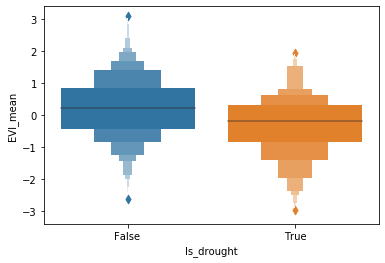

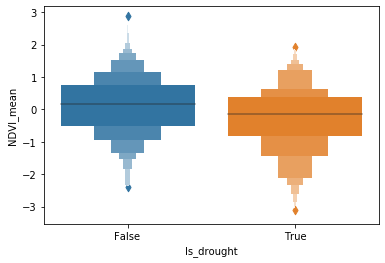

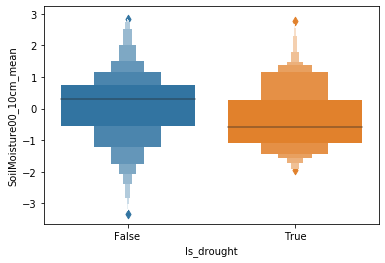

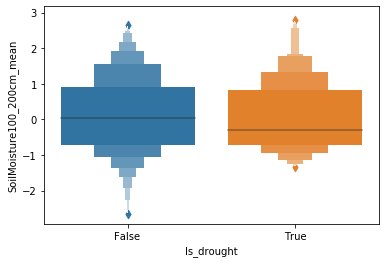

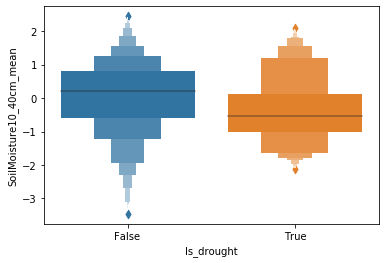

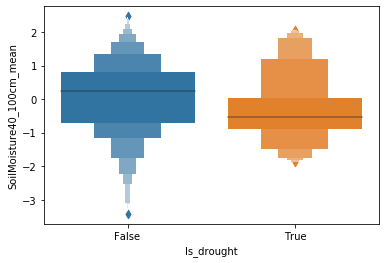

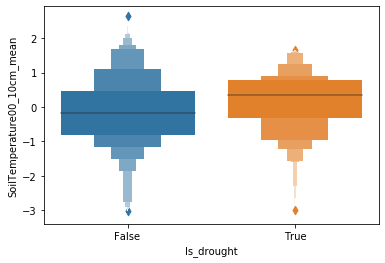

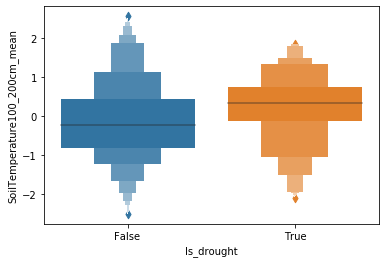

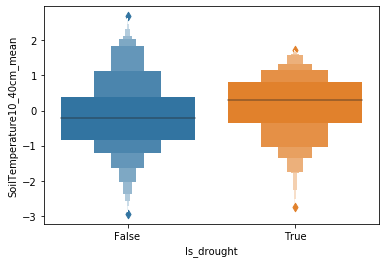

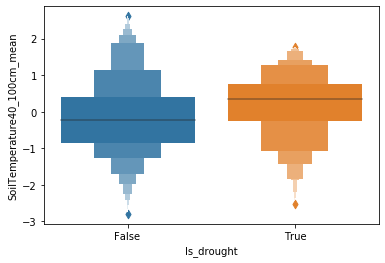

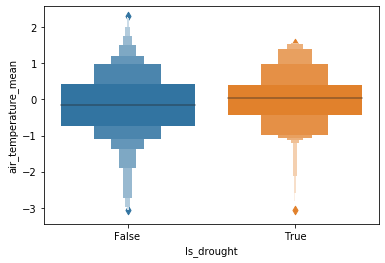

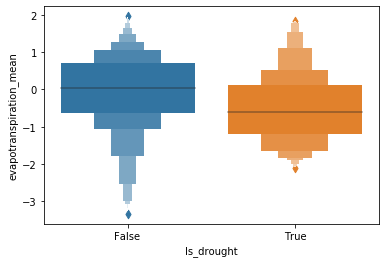

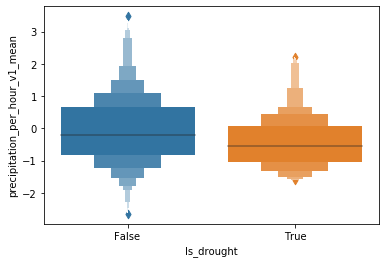

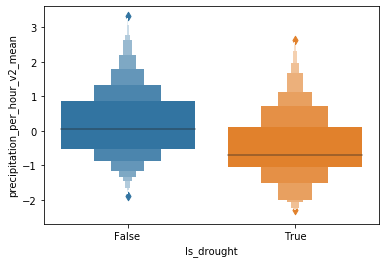

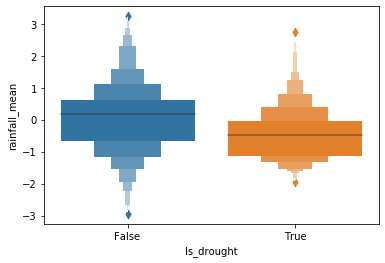

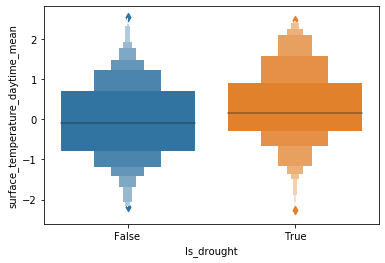

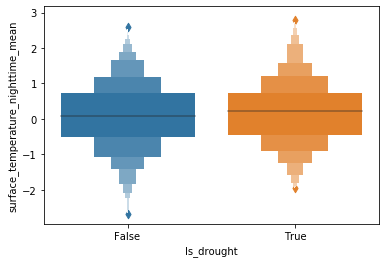

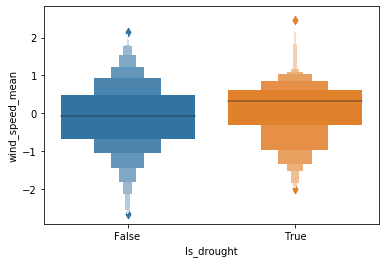

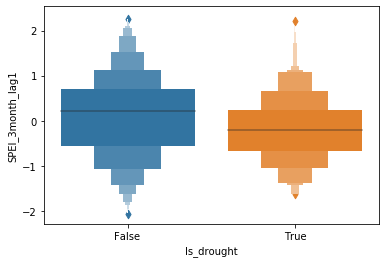

In [5]:
for col in All_feature_list:
    plt.figure()
    sns.boxenplot(x=label_name,y=col,data=reduced_data)
    

In [38]:
median_vals = reduced_data.drop(labels='year',axis=1).groupby(label_name).median().T.reset_index()
median_vals.rename(columns={True:'yes_drought', False:'no_drought', 'Is_drought':'index'}, inplace= True)
median_vals['diff'] = (median_vals['yes_drought']-median_vals['no_drought']).abs()
median_vals.sort_values('diff',ascending=False,inplace=True)
median_vals

Is_drought,index,no_drought,yes_drought,diff
21,drought_desinventar,0.000000,1.000000,1.000000
19,drought_reported,0.000000,1.000000,1.000000
2,SoilMoisture00_10cm_mean,0.288314,-0.570226,0.858541
5,SoilMoisture40_100cm_mean,0.232961,-0.531513,0.764474
13,precipitation_per_hour_v2_mean,0.063213,-0.698218,0.761430
4,SoilMoisture10_40cm_mean,0.222095,-0.530722,0.752817
14,rainfall_mean,0.176996,-0.486975,0.663971
11,evapotranspiration_mean,0.044880,-0.602795,0.647675
9,SoilTemperature40_100cm_mean,-0.236434,0.361192,0.597626
7,SoilTemperature100_200cm_mean,-0.244349,0.320006,0.564355


In [39]:
features_2_drop = ['NDVI_mean','SoilMoisture40_100cm_mean','SoilMoisture100_200cm_mean',
                  'air_temperature_mean','evapotranspiration_mean','precipitation_per_hour_v1_mean',
                  'rainfall_mean','surface_temperature_nighttime_mean','wind_speed_mean',
                  'SoilTemperature40_100cm_mean','SoilTemperature100_200cm_mean']


labels_2_drop = ['drought_reported', 'drought_news_article', 'drought_desinventar']

selected_data = reduced_data.drop(labels=features_2_drop+labels_2_drop,axis=1).copy()

print(selected_data.shape)

selected_features = list(set(selected_data.columns).intersection(All_feature_list))

selected_features.sort()

selected_data.head()



(366, 12)


,District,year,Season,EVI_mean,SoilMoisture00_10cm_mean,SoilMoisture10_40cm_mean,SoilTemperature00_10cm_mean,SoilTemperature10_40cm_mean,precipitation_per_hour_v2_mean,surface_temperature_daytime_mean,SPEI_3month_lag1,Is_drought
0,ABIM,2008,11_12,0.472112,-0.299935,-0.513232,0.023236,-0.000761,0.410969,-0.863988,-0.956344,False
1,ABIM,2008,6_7,-0.777660,-1.087030,-1.219722,0.439307,0.199290,-1.185724,0.536434,-1.891516,False
2,ABIM,2009,11_12,-0.959034,-1.828673,-2.402835,1.557044,1.822465,-0.086266,0.695129,-0.076895,False
3,ABIM,2009,6_7,-0.120184,-0.739839,-0.530722,0.340174,0.370177,-1.107978,-0.054718,-0.231664,True
4,ABIM,2010,11_12,-0.392718,0.371432,0.039433,-0.270119,-0.319993,-0.157900,-0.416993,-0.565711,False


In [40]:
selected_data[label_name].sum()

65

In [41]:
selected_features

['EVI_mean',
 'SPEI_3month_lag1',
 'SoilMoisture00_10cm_mean',
 'SoilMoisture10_40cm_mean',
 'SoilTemperature00_10cm_mean',
 'SoilTemperature10_40cm_mean',
 'precipitation_per_hour_v2_mean',
 'surface_temperature_daytime_mean']

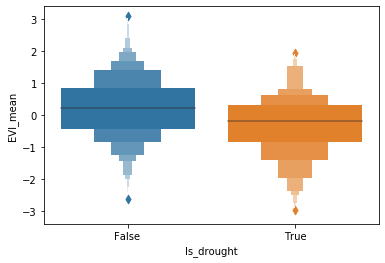

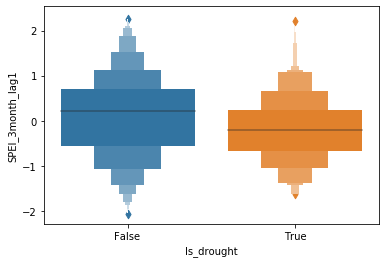

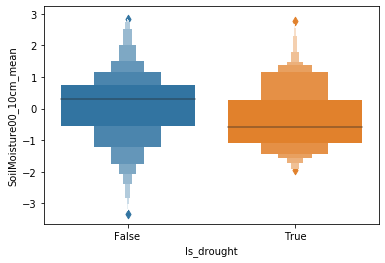

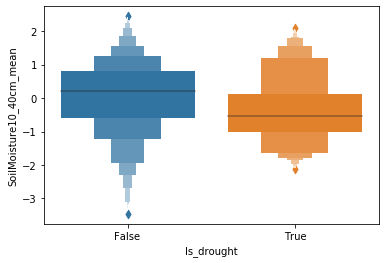

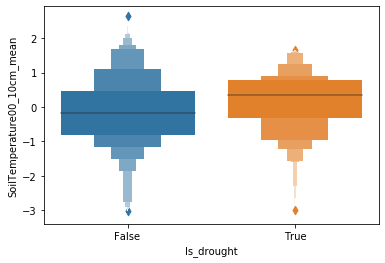

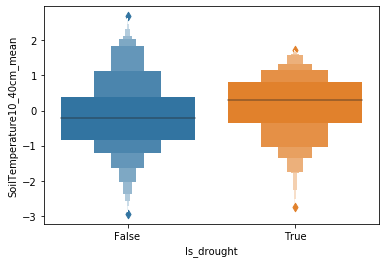

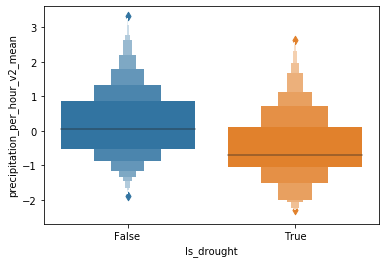

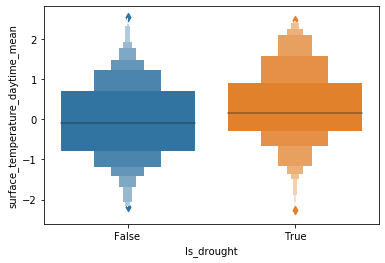

In [42]:
for col in selected_features:
    plt.figure()
    sns.boxenplot(x=label_name,y=col,data=reduced_data)
    